<a href="https://colab.research.google.com/github/tanish-garg-1/ML-Lab-Assignments/blob/main/Parameter_Optimization_of_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sample 1:   0%|          | 0/100 [00:00<?, ?it/s]

Sample 2:   0%|          | 0/100 [00:00<?, ?it/s]

Sample 3:   0%|          | 0/100 [00:00<?, ?it/s]

Sample 4:   0%|          | 0/100 [00:00<?, ?it/s]

Sample 5:   0%|          | 0/100 [00:00<?, ?it/s]

Sample 6:   0%|          | 0/100 [00:00<?, ?it/s]

Sample 7:   0%|          | 0/100 [00:00<?, ?it/s]

Sample 8:   0%|          | 0/100 [00:00<?, ?it/s]

Sample 9:   0%|          | 0/100 [00:00<?, ?it/s]

Sample 10:   0%|          | 0/100 [00:00<?, ?it/s]


Results Table:
  Sample  Best Accuracy              Parameters
0     S1          0.988         rbf, 10.0, 10.0
1     S2          0.965    poly, 46.416, 1000.0
2     S3          0.994     linear, 0.1, 1000.0
3     S4          0.988   linear, 2.154, 46.416
4     S5          0.988    linear, 0.022, 0.001
5     S6          0.988   linear, 0.022, 1000.0
6     S7          0.982     linear, 2.154, 10.0
7     S8          0.982      linear, 0.464, 0.1
8     S9          0.988     poly, 46.416, 0.464
9    S10          0.994  linear, 2.154, 215.443


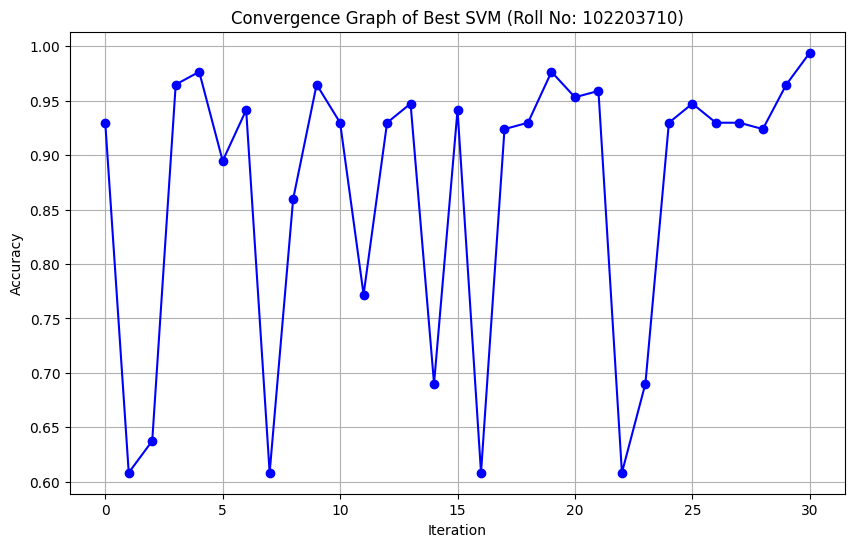

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

kernels = ['linear', 'rbf', 'poly']
C_range = np.logspace(-3, 3, 10)
gamma_range = np.logspace(-3, 3, 10)

results = []
best_accuracy = 0
best_params = None
convergence_data = []

for sample in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=sample)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    sample_best_acc = 0
    sample_best_params = None
    iteration_accuracies = []

    for iteration in tqdm(range(100), desc=f"Sample {sample + 1}"):
        for kernel in kernels:
            C = np.random.choice(C_range)
            gamma = np.random.choice(gamma_range)

            svm = SVC(kernel=kernel, C=C, gamma='auto', random_state=42)
            svm.fit(X_train_scaled, y_train)
            accuracy = svm.score(X_test_scaled, y_test)

            iteration_accuracies.append(accuracy)

            if accuracy > sample_best_acc:
                sample_best_acc = accuracy
                sample_best_params = {'kernel': kernel, 'C': C, 'gamma': gamma}

                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_params = sample_best_params
                    convergence_data = iteration_accuracies.copy()

    results.append({
        'Sample': f'S{sample + 1}',
        'Best Accuracy': round(sample_best_acc, 3),
        'Parameters': f"{sample_best_params['kernel']}, {round(sample_best_params['C'], 3)}, {round(sample_best_params['gamma'], 3)}"
    })

results_df = pd.DataFrame(results)
print("\nResults Table:")
print(results_df)

plt.figure(figsize=(10, 6))
plt.plot(convergence_data, marker='o', linestyle='-', color='b')
plt.title('Convergence Graph of Best SVM (Roll No: 102203710)')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()
